##                                    **HAND-WRIITEN DIGIT RECOGNITION** 


## The project task is to recognize hand-written-digit
## The dataset we is mnist which available in keras
## The images are in grayscale i.e. one color channel
## I have use CNN to classify images

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [50]:
from tensorflow.keras.datasets import mnist

In [51]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

## Preprocessing-Data

In [52]:
single_image=x_train[1]

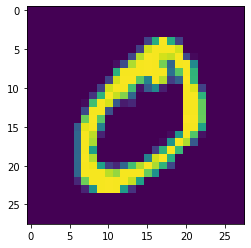

In [53]:
plt.imshow(single_image)

In [54]:
y_train1=y_train
y_test1=y_test

In [55]:
y_test=pd.get_dummies(y_test).values

In [56]:
y_train=pd.get_dummies(y_train).values

In [57]:
from tensorflow.keras.utils import to_categorical

In [58]:
## to_categorical(y_te)

In [59]:
y_test.shape

(10000, 10)

In [60]:
## NORMALIZATION

In [61]:
x_train=x_train/255

In [62]:
x_test=x_test/255

In [63]:
x_train.max()

1.0

In [64]:
## RESHAPE DATA

In [65]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [66]:
x_train=x_train.reshape(60000,28,28,1)

In [67]:
x_test=x_test.reshape(10000,28,28,1)

## CREATING MODEL

In [68]:
from tensorflow.keras.models import Sequential

In [69]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [70]:
model=Sequential()


model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])




In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [73]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2842 - accuracy: 0.9172 - val_loss: 0.0536 - val_accuracy: 0.9836
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0406 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0476 - val_accuracy: 0.9848


In [74]:
model.save('/content/drive/MyDrive/hand_writtien_digit_recognition.h5')

## EVALUATING MODEL


In [75]:
model.history.history

{'accuracy': [0.9598000049591064, 0.9851499795913696, 0.9901666641235352],
 'loss': [0.13731011748313904, 0.04833557829260826, 0.03088124468922615],
 'val_accuracy': [0.9836000204086304, 0.9866999983787537, 0.9847999811172485],
 'val_loss': [0.05361767113208771, 0.04057655483484268, 0.04759962484240532]}

In [76]:
metrics=pd.DataFrame(model.history.history)

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
predictions=model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [79]:
predictions[:5]

array([7, 2, 1, 0, 4])

In [80]:
import seaborn as sns

In [81]:
y_test1[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [82]:
print(classification_report(y_test1,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      1.00      0.98       892
           6       1.00      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



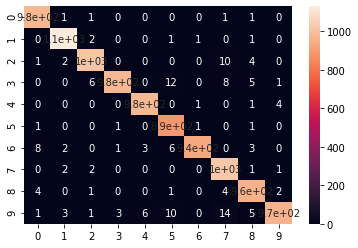

In [83]:
sns.heatmap(confusion_matrix(y_test1,predictions),annot=True)

In [84]:
model.history.history

{}

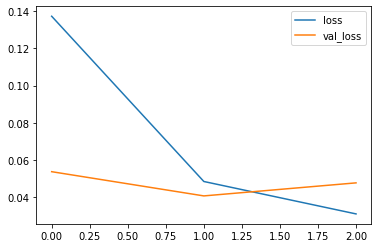

In [87]:
metrics[["loss","val_loss"]].plot()

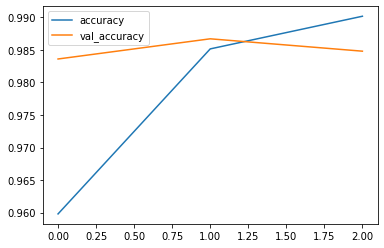

In [88]:
metrics[["accuracy","val_accuracy"]].plot()

## TESTING MODEL

In [89]:
sample_image=x_test[0]

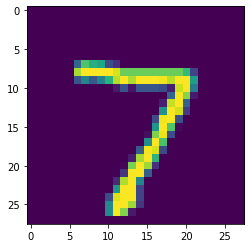

In [91]:
plt.imshow(sample_image.reshape(28,28))

In [93]:
model.predict_classes(sample_image.reshape(1,28,28,1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])

## IT'S PREDICT ACCURATE VALUE FOR THIS RESULT
## OUR MODEL ACCURACY IS 0.98 WHICH IS VERY GOOD 
## OUR MODEL IS PERFORMING WELL:-)

## THANK YOU